This data has been taken from LendingClub. LendingClub connects people those who need money from investors who have money. 
We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

# Note:RandomForest
    
classification is  a process of dividing the datasets into different categories or groups by adding labels.
Random Forest::

Builds on multiple decision trees and merges together
More accurate and stable prediction
Trained with Bagging method i.e combination of learning model increases the overall result. If we combine the learning from different models and take the highest voting, it will increase the overall result and reduces overfitting.
Process: given a large training dataset … divide the dataset into n sub samples and create a decision tree for each sub samples.

# Decision Tree


In [45]:
import numpy as np
import pandas as pd

In [5]:
loans  = pd.read_csv(r"C:\Users\User\Documents\myProjectC#\Refactored_Py_DS_ML_Bootcamp-master\15-Decision-Trees-and-Random-Forests\loan_data.csv")

In [6]:
loans.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [7]:
loans.shape

(9578, 14)

In [8]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
#Exploratory data analysis

Text(0.5, 0, 'FICO')

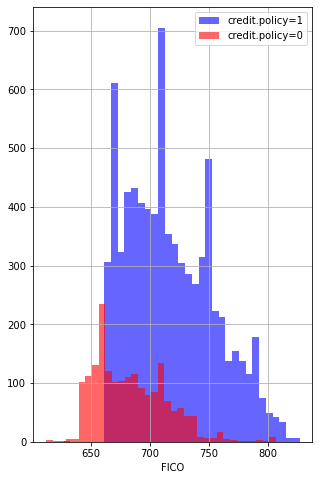

In [19]:
import matplotlib.pylab as plt
plt.figure(figsize=(5,8))
loans[loans['credit.policy'] == 1]['fico'].hist(bins=35, color='blue',label = 'credit.policy=1', alpha=0.6)
loans[loans['credit.policy'] == 0]['fico'].hist(bins=35, color='red', label = 'credit.policy=0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

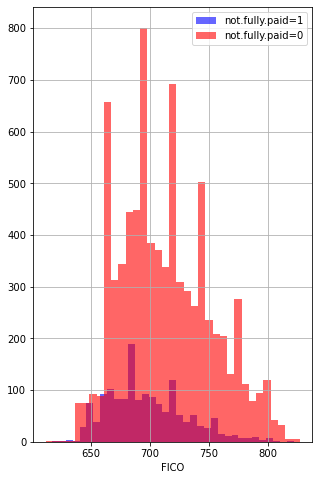

In [20]:
import matplotlib.pylab as plt
plt.figure(figsize=(5,8))
loans[loans['not.fully.paid'] == 1]['fico'].hist(bins=35, color='blue',label = 'not.fully.paid=1', alpha=0.6)
loans[loans['not.fully.paid'] == 0]['fico'].hist(bins=35, color='red', label = 'not.fully.paid=0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

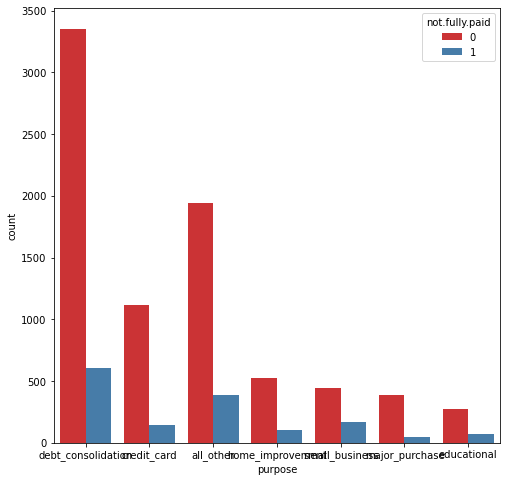

In [23]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot(x = 'purpose', hue='not.fully.paid', data = loans, palette='Set1')

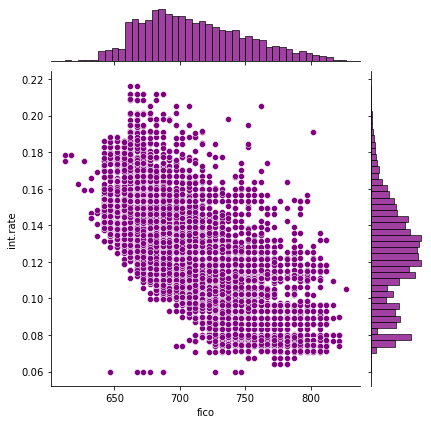

In [25]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans, color='purple')

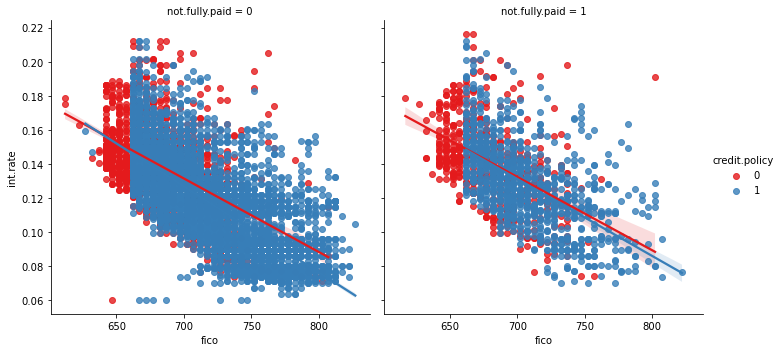

In [31]:
sns.lmplot(y='int.rate', x = 'fico', data=loans, hue = 'credit.policy', col = 'not.fully.paid', palette='Set1')

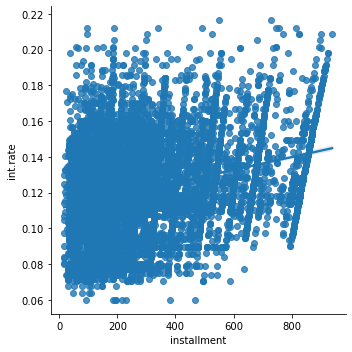

In [26]:
sns.lmplot(y = 'int.rate', x='installment', data = loans)

In [32]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
#handle categorical variable


In [39]:
loans['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

In [37]:
final_data = pd.get_dummies(loans['purpose'], drop_first=True)

In [38]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   credit_card         9578 non-null   uint8
 1   debt_consolidation  9578 non-null   uint8
 2   educational         9578 non-null   uint8
 3   home_improvement    9578 non-null   uint8
 4   major_purchase      9578 non-null   uint8
 5   small_business      9578 non-null   uint8
dtypes: uint8(6)
memory usage: 56.2 KB


In [40]:
train_data = pd.concat([loans,final_data], axis=1)

In [41]:
train_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [42]:
train_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [43]:
train_data.drop('purpose', inplace=True, axis=1)

In [44]:
train_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [46]:
y = file['not.fully.paid']
X = file.drop('not.fully.paid', axis=1)

In [52]:
X= X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors = 'coerce')

In [54]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=10)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:

dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
pred = dtree.predict(x_test)

Text(0, 0.5, 'prediction')

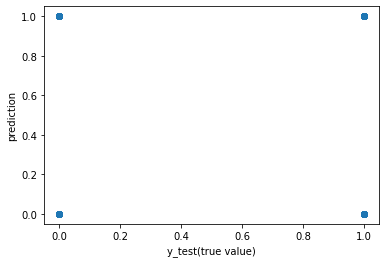

In [60]:
import matplotlib.pylab as plt
plt.scatter(y_test, pred)
plt.xlabel('y_test(true value)')
plt.ylabel('prediction')

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
report = classification_report(y_test,pred)
print(report)
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3241
           1       0.20      0.22      0.21       591

    accuracy                           0.74      3832
   macro avg       0.53      0.53      0.53      3832
weighted avg       0.75      0.74      0.75      3832



[[2717  524]
 [ 461  130]]


In [ ]:
#compare Decision tree model with Random forest model

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rnf = RandomForestClassifier( )
rnf.fit(x_train,y_train)


RandomForestClassifier()

In [67]:
pred = rnf.predict(x_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
report = classification_report(y_test,pred)
print(report)
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3241
           1       0.62      0.02      0.03       591

    accuracy                           0.85      3832
   macro avg       0.74      0.51      0.47      3832
weighted avg       0.81      0.85      0.78      3832



[[3235    6]
 [ 581   10]]
